# Create Dataset

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
from sklearn import set_config
set_config(display='diagram')

In [14]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=20,
    random_state=42
)

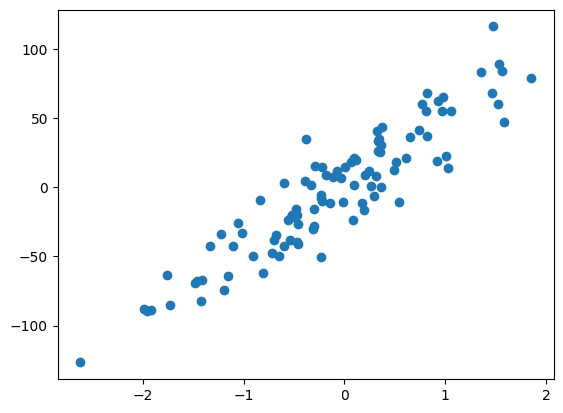

In [4]:
# see how our data looks like
plt.scatter(X, y)

# Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
lr = LinearRegression()
lr

LinearRegression()

In [63]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
lr.coef_

array([46.56592693])

In [27]:
lr.intercept_

np.float64(2.2713664531535693)

In [48]:
y_pred = lr.predict(X_test)
y_pred

array([-59.57684805,  18.90064436,  17.69695519,  75.1304486 ,
       -88.98248934,  44.89791458, -46.98192338,   0.60309373,
       -25.74765969,  -7.95785862, -12.12739445,   5.4158799 ,
        47.69852956, -35.37688758,  45.63728843,   6.79187252,
        16.90458478, -53.4311038 ,  -8.24211626, -23.07831972])

In [49]:
r2_score(y_test, y_pred)

0.878164919219213

# Step 1: First we Calculate the b/ intercept

- In First step we assuming we have m 
- Then we take a random value of b = -120
- And create fit 
- Let's see what happens

In [50]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 47.13323967
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        
        # Calculate the b using GD
        for i in range(self.epochs):
            
            # calculate the loss_slope
            loss_slope = -2 * np.sum(y - (self.m * X.ravel()) - self.b)
            self.b = self.b - (self.lr * loss_slope) 
            
            # let's see what is loss function and b
            print(f"Loss is {loss_slope}  ---> b is {self.b}")
        
        # Final b    
        print("\n Our Model find this is the 'b' of our data", self.b)
        

In [51]:
gd = GDRegressor(learning_rate=0.1, epochs=10)

In [52]:
gd.fit(X_train, y_train) # due to learning rate so hight

Loss is -19572.1006829379  ---> b is 1837.21006829379
Loss is 293581.5102440685  ---> b is -27520.940956113063
Loss is -4403722.6536610285  ---> b is 412851.3244099898
Loss is 66055839.80491543  ---> b is -6192732.656081554
Loss is -990837597.0737315  ---> b is 92891027.0512916
Loss is 14862563956.105972  ---> b is -1393365368.5593057
Loss is -222938459341.5896  ---> b is 20900480565.599655
Loss is 3344076890123.8438  ---> b is -313507208446.7847
Loss is -50161153351857.66  ---> b is 4702608126738.98
Loss is 752417300277864.8  ---> b is -70539121901047.5

 Our Model find this is the 'b' of our data -70539121901047.5


In [53]:
gd = GDRegressor(learning_rate=0.001, epochs=120).fit(X_train, y_train)

Loss is -19572.1006829379  ---> b is -100.4278993170621
Loss is -16440.564573667838  ---> b is -83.98733474339426
Loss is -13810.074241880984  ---> b is -70.17726050151327
Loss is -11600.462363180026  ---> b is -58.576798138333245
Loss is -9744.388385071223  ---> b is -48.83240975326202
Loss is -8185.286243459825  ---> b is -40.6471235098022
Loss is -6875.640444506254  ---> b is -33.771483065295946
Loss is -5775.537973385253  ---> b is -27.99594509191069
Loss is -4851.451897643612  ---> b is -23.144493194267078
Loss is -4075.2195940206343  ---> b is -19.069273600246444
Loss is -3423.184458977333  ---> b is -15.64608914126911
Loss is -2875.4749455409597  ---> b is -12.77061419572815
Loss is -2415.398954254406  ---> b is -10.355215241473744
Loss is -2028.935121573701  ---> b is -8.326280119900042
Loss is -1704.3055021219086  ---> b is -6.621974617778134
Loss is -1431.6166217824034  ---> b is -5.190357995995731
Loss is -1202.557962297219  ---> b is -3.9878000336985115
Loss is -1010.148688

- If we choose the 
- Learning Rate nearly 0.001
- epochs nearly 100
- we got 2.33 
- same as sklearn 

---


# Step 2: Predict function add

In [54]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 47.13323967
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        
        # Calculate the b using GD
        for i in range(self.epochs):
            
            # calculate the loss_slope
            loss_slope = -2 * np.sum(y - (self.m * X.ravel()) - self.b)
            self.b = self.b - (self.lr * loss_slope) 

        # Final b    
        print("\n Our Model find this is the 'b' of our data", self.b)
        
    def predict(self, X):
        return (self.m * X) + self.b
        

For Simple Batch GD 
- b_slope = -2 * summation((m * X) - b)
- y_hat = (m * X) + b

In [55]:
gd = GDRegressor(learning_rate=0.001, epochs=100)

In [57]:
gd.fit(X_train, y_train)


 Our Model find this is the 'b' of our data 2.3256259915910884


In [60]:
gd.predict(X_test)

array([[-60.27608538],
       [ 19.15749841],
       [ 17.9391447 ],
       [ 76.07235042],
       [-90.03997563],
       [ 45.4714934 ],
       [-47.52771672],
       [  0.6370287 ],
       [-26.03475597],
       [ -8.02822175],
       [-12.24855503],
       [  5.50844905],
       [ 48.30622828],
       [-35.78129677],
       [ 46.21987505],
       [  6.90120539],
       [ 17.13712083],
       [-54.05546752],
       [ -8.31594249],
       [-23.33289544]])

In [59]:
y_pred = gd.predict(X_test)
r2_score(y_test, y_pred)

0.8793218453383842

- We reach the same value of sklearn
- Well done 
- We did it 🔥🙌
- 07:48 IST 26-04-2025